In [1]:
import opendatasets as od

In [9]:
od.download('https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents/code?datasetId=199387&sortBy=voteCount')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: taniakheria
Your Kaggle Key: ········


100%|██████████| 653M/653M [02:02<00:00, 5.58MB/s] 


In [1]:
path = 'us-accidents/US_Accidents_March23.csv'

In [2]:
import pandas as pd
df = pd.read_csv(path)

In [3]:
df.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

In [18]:
df.isnull().sum()

ID                             0
Source                         0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                  3402762
End_Lng                  3402762
Distance(mi)                   0
Description                    5
Street                     10869
City                         253
County                         0
State                          0
Zipcode                     1915
Country                        0
Timezone                    7808
Airport_Code               22635
Weather_Timestamp         120228
Temperature(F)            163853
Wind_Chill(F)            1999019
Humidity(%)               174144
Pressure(in)              140679
Visibility(mi)            177098
Wind_Direction            175206
Wind_Speed(mph)           571233
Precipitation(in)        2203586
Weather_Condition         173459
Amenity                        0
Bump      

In [4]:
null_columns = df.isnull().sum().sort_values(ascending=False)
null_columns[:10]

End_Lat              3402762
End_Lng              3402762
Precipitation(in)    2203586
Wind_Chill(F)        1999019
Wind_Speed(mph)       571233
Visibility(mi)        177098
Wind_Direction        175206
Humidity(%)           174144
Weather_Condition     173459
Temperature(F)        163853
dtype: int64

In [21]:
type(null_columns)

pandas.core.series.Series

### Columns containing max null values

<Axes: >

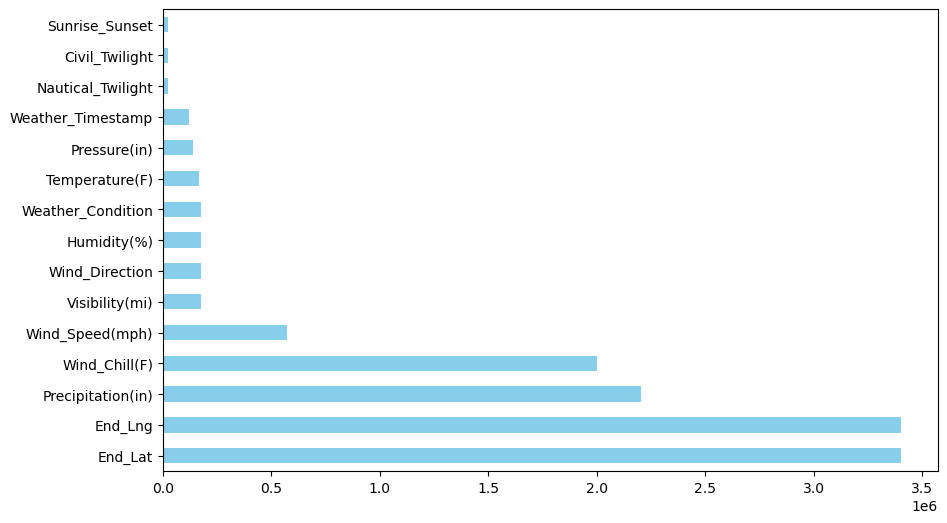

In [6]:
null_columns[:15].plot(kind='barh', color='skyblue', figsize=(10, 6))

### All the columns in the dataframe:

In [23]:
df.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

## Distribution of accidents as per the cities

In [24]:
cities = df.City.value_counts().sort_values(ascending=False)
cities

City
Miami                           186917
Houston                         169609
Los Angeles                     156491
Charlotte                       138652
Dallas                          130939
                                 ...  
Bon Secour                           1
Sidney Center                        1
Fluker                               1
Mapleville                           1
American Fork-Pleasant Grove         1
Name: count, Length: 13678, dtype: int64

***
***1. City with the highest number of accidents is Miami.***
***
***2. City with the second highest number of accidents is Houston.***

In [25]:
#Converting the cities series to a dataframe:
cities_df = cities.reset_index()
cities_df

,City,count
0,Miami,186917
1,Houston,169609
2,Los Angeles,156491
3,Charlotte,138652
4,Dallas,130939
...,...,...
13673,Bon Secour,1
13674,Sidney Center,1
13675,Fluker,1
13676,Mapleville,1


In [11]:
#Expressing the city wise accidents in percentage
percentage_cities = (df.City.value_counts()/len(df)*100).sort_values(ascending=False)
percentage_cities

City
Miami                           2.418575
Houston                         2.194622
Los Angeles                     2.024884
Charlotte                       1.794060
Dallas                          1.694259
                                  ...   
Bon Secour                      0.000013
Sidney Center                   0.000013
Fluker                          0.000013
Mapleville                      0.000013
American Fork-Pleasant Grove    0.000013
Name: count, Length: 13678, dtype: float64

In [12]:
percentage_cities_df = percentage_cities.reset_index()
percentage_cities_df 
##This is used to find the column names

,City,count
0,Miami,2.418575
1,Houston,2.194622
2,Los Angeles,2.024884
3,Charlotte,1.794060
4,Dallas,1.694259
...,...,...
13673,Bon Secour,0.000013
13674,Sidney Center,0.000013
13675,Fluker,0.000013
13676,Mapleville,0.000013


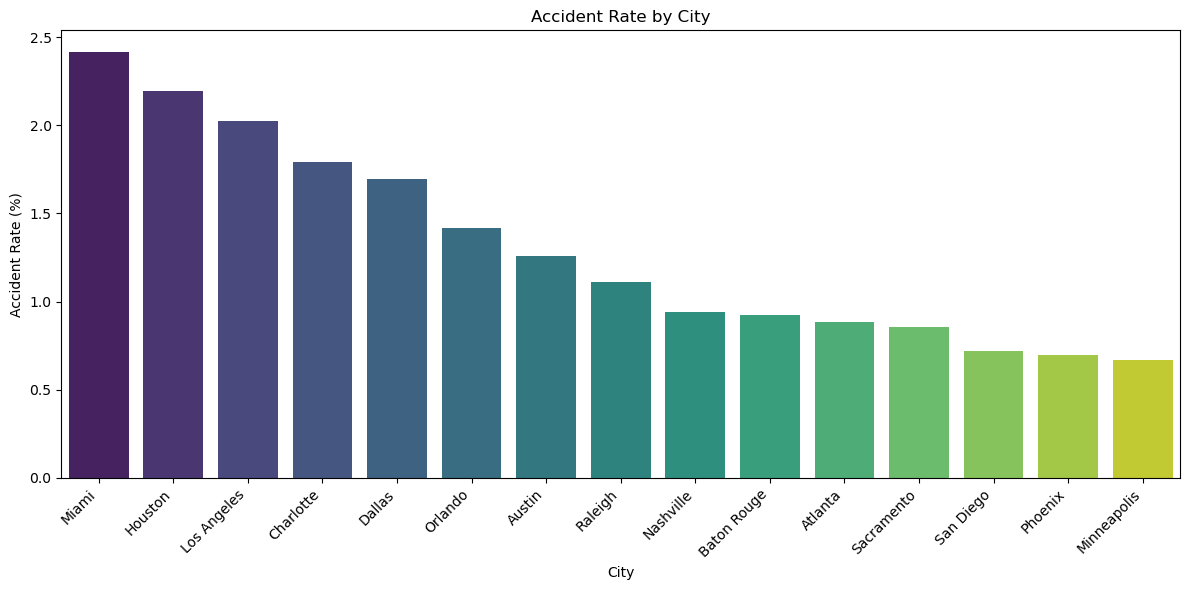

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a DataFrame 'cities' with columns 'City' and 'AccidentRate'
plt.figure(figsize=(12, 6))

# Use the 'viridis' colormap for a nice gradient effect
sns.barplot(x='City', y='count', data=percentage_cities_df[:15], palette='viridis')

plt.title('Accident Rate by City')
plt.xlabel('City')
plt.ylabel('Accident Rate (%)')
plt.xticks(rotation=45, ha='right')

# Format y-axis as percentages

plt.tight_layout()
plt.show()

# Distribution of Accidents by Severity Level


In [27]:
#Distribution of accidents as per the severity level
df.Severity.value_counts()

Severity
2    6156981
3    1299337
4     204710
1      67366
Name: count, dtype: int64

**_Maximum number of accidents were of severity level '2'._**



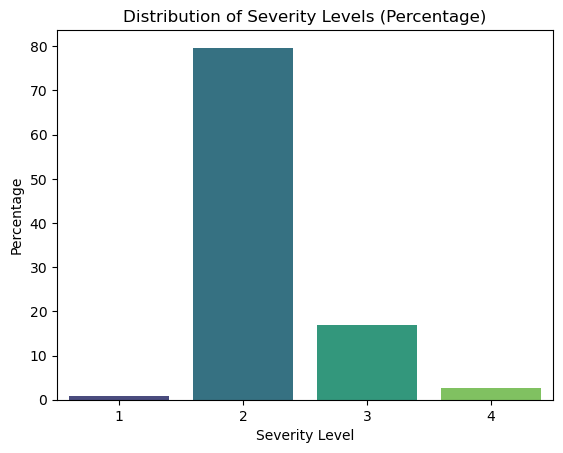

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
total_accidents = len(df)  # Total number of accidents in the DataFrame

# Calculate the percentage for each severity level
df['Percentage'] = df.groupby('Severity')['Severity'].transform('count') / total_accidents * 100

# Remove duplicates after adding the Percentage column
df = df.drop_duplicates(subset=['Severity', 'Percentage'])

# Plotting
sns.barplot(x='Severity', y='Percentage', data=df, palette='viridis')
plt.xlabel('Severity Level')
plt.ylabel('Percentage')
plt.title('Distribution of Severity Levels (Percentage)')
plt.show()

 > **_75% accidents are of severity level 2_**



## Impact of bumps on the rate of accidents

In [35]:
df_bump = df.Bump.value_counts()
df_bump

Bump
False    7724880
True        3514
Name: count, dtype: int64

In [36]:
df_bump.reset_index()

,Bump,count
0,False,7724880
1,True,3514


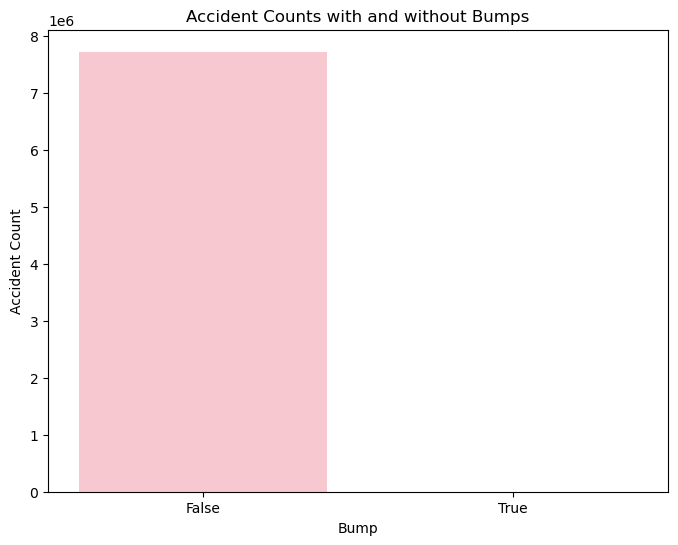

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a histogram using Seaborn's displot
plt.figure(figsize=(8, 6))
sns.barplot(x=df_bump.index, y=df_bump.values, palette=['pink', 'lightcoral'])
plt.xlabel('Bump')
plt.ylabel('Accident Count')
plt.title('Accident Counts with and without Bumps')
plt.show()

> **_Bumps do not have any major impact on the rate of accidents._**

### Most severe accidents:

In [38]:
severe_df = df[df['Severity'] == 4]
severe_df

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
619,A-620,Source2,4,2016-03-11 13:18:48,2016-03-11 13:48:48,39.917412,-83.014236,NaN,NaN,0.010,...,False,False,False,False,False,False,Day,Day,Day,Day
1197,A-1198,Source2,4,2016-06-24 22:28:49,2016-06-24 22:58:49,37.321117,-121.899887,NaN,NaN,0.000,...,False,False,False,False,False,False,Night,Night,Night,Night
1901,A-1902,Source2,4,2016-07-01 14:09:13,2016-07-01 14:39:13,37.630623,-122.435043,NaN,NaN,0.000,...,False,False,False,False,False,False,Day,Day,Day,Day
4143,A-4144,Source2,4,2016-07-25 14:23:33,2016-07-25 15:11:13,37.339115,-121.851807,NaN,NaN,0.000,...,False,False,False,False,False,False,Day,Day,Day,Day
4964,A-4965,Source2,4,2016-08-01 07:44:37,2016-08-01 08:29:37,37.710648,-122.166687,NaN,NaN,0.000,...,False,False,False,False,False,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7728354,A-7777722,Source1,4,2019-08-23 17:25:12,2019-08-23 17:54:00,38.995930,-121.672020,39.00317,-121.662679,0.708,...,False,False,False,False,False,False,Day,Day,Day,Day
7728355,A-7777723,Source1,4,2019-08-23 17:25:12,2019-08-23 17:54:00,39.003170,-121.662679,38.99593,-121.672020,0.708,...,False,False,False,False,False,False,Day,Day,Day,Day
7728366,A-7777734,Source1,4,2019-08-23 13:39:48,2019-08-23 14:05:33,33.685990,-117.886260,33.68537,-117.885720,0.053,...,False,False,False,False,False,False,Day,Day,Day,Day
7728367,A-7777735,Source1,4,2019-08-23 13:39:48,2019-08-23 14:05:33,33.687300,-117.890190,33.68599,-117.886260,0.243,...,False,False,False,False,False,False,Day,Day,Day,Day


In [39]:
severe_cities = severe_df.City.value_counts().sort_values(ascending=False)
severe_cities

City
Atlanta            2841
Miami              2192
Visalia            1286
Dallas             1199
Orlando            1114
                   ... 
Dammeron Valley       1
Emden                 1
San Ardo              1
Warner Springs        1
Upper Falls           1
Name: count, Length: 9756, dtype: int64

> **_The highest number of level 4 severe accidents took place in Atlanta city followed by Miami._**

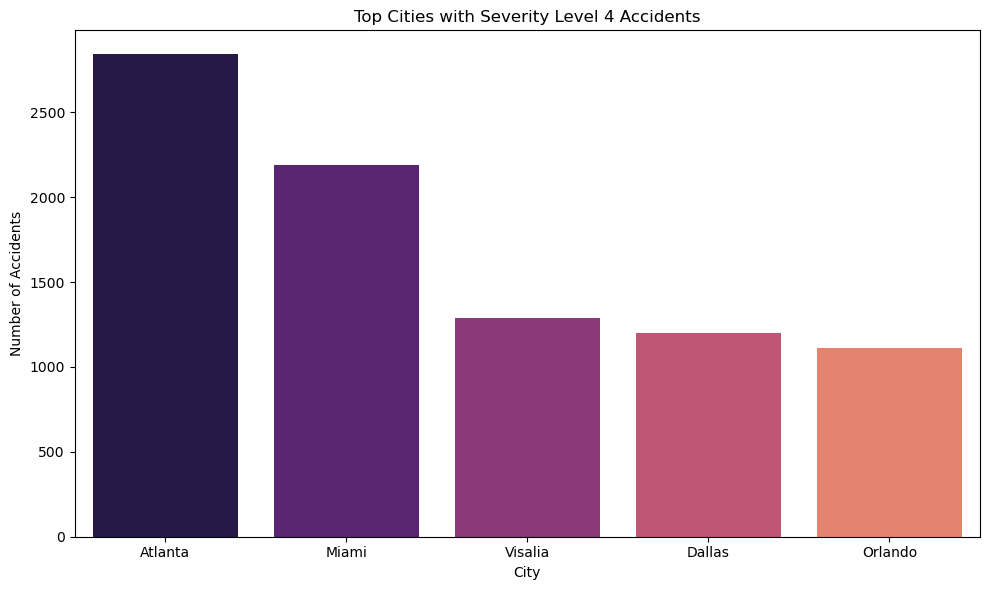

In [40]:
# Top 5 cities with highest number of severe accidents

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a DataFrame 'severe_df' with columns 'City' and 'Severity'
severe_cities = severe_df.City.value_counts().sort_values(ascending=False)

# Get the top 5 cities and their counts
top_cities = severe_cities[:5]

# Set a better color palette
sns.set_palette("magma")

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_cities.index, y=top_cities.values)
plt.title('Top Cities with Severity Level 4 Accidents')
plt.xlabel('City')
plt.ylabel('Number of Accidents')

plt.tight_layout()
plt.show()

# Impact of weather conditions on the number of accidents

In [41]:
# Affect of weather condition of the rate of accidents:

df['Weather_Condition'].value_counts().sort_values(ascending=False)

Weather_Condition
Fair                           2560802
Mostly Cloudy                  1016195
Cloudy                          817082
Clear                           808743
Partly Cloudy                   698972
                                ...   
Dust Whirls                          1
Heavy Freezing Rain / Windy          1
Partial Fog / Windy                  1
Heavy Smoke                          1
Drifting Snow                        1
Name: count, Length: 144, dtype: int64

> **_Most accidents took place on a fair weather day which conveys that the reason behind the accident was something else. But conisderable number of accidents took place on a cloudy day too._**

## Impact of Amenity on the number of accidents

In [42]:
df_Amenity = df.Amenity.value_counts()
df_Amenity

Amenity
False    7632060
True       96334
Name: count, dtype: int64

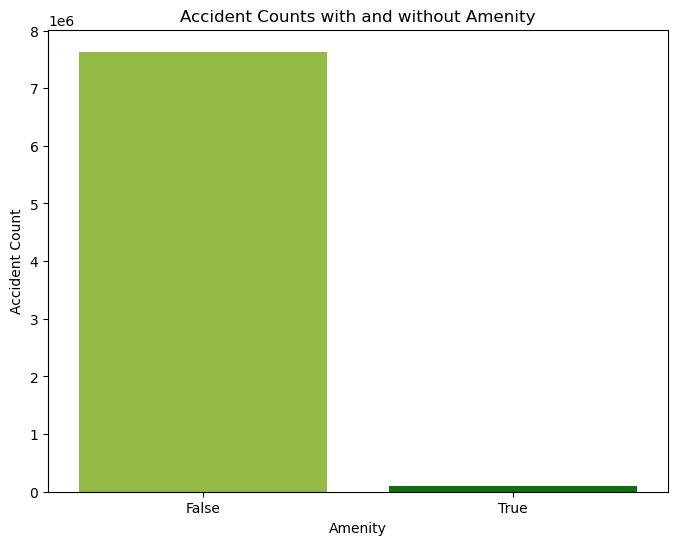

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a histogram using Seaborn's displot
plt.figure(figsize=(8, 6))
sns.barplot(x=df_Amenity.index, y=df_Amenity.values, palette=['yellowgreen', 'green'])
plt.xlabel('Amenity')
plt.ylabel('Accident Count')
plt.title('Accident Counts with and without Amenity')
plt.show()

> **_Amenity do not have any major impact on the accident rate._**

# Trend of accident rate daily, weekly and monthly

In [14]:
df.Start_Time = pd.to_datetime(df['Start_Time'], errors='coerce')
df.Start_Time

0         2016-02-08 05:46:00
1         2016-02-08 06:07:59
2         2016-02-08 06:49:27
3         2016-02-08 07:23:34
4         2016-02-08 07:39:07
                  ...        
7728389   2019-08-23 18:03:25
7728390   2019-08-23 19:11:30
7728391   2019-08-23 19:00:21
7728392   2019-08-23 19:00:21
7728393   2019-08-23 18:52:06
Name: Start_Time, Length: 7728394, dtype: datetime64[ns]

In [56]:
print(df.Start_Time.dt.hour)  ##Extracting hour from the time

0           5.0
1           6.0
2           6.0
3           7.0
4           7.0
           ... 
7728389    18.0
7728390    19.0
7728391    19.0
7728392    19.0
7728393    18.0
Name: Start_Time, Length: 7728394, dtype: float64


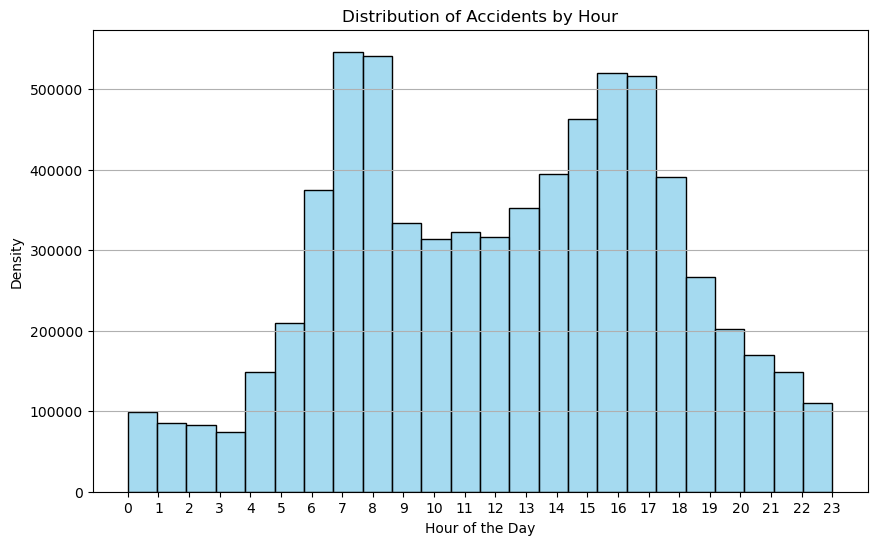

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing the accident data
hourly_accidents = df['Start_Time'].dt.hour

# Plotting the number of accidents by hour using a distplot
plt.figure(figsize=(10, 6))
sns.histplot(hourly_accidents, bins=24, color='skyblue')
plt.title('Distribution of Accidents by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Density')
plt.xticks(range(24))
plt.grid(axis='y')
plt.show()

> **_The maximum number of accidents take place between 7 am to 9 am in the morning and 2pm to 5pm in the evening (Office hours)._**

In [58]:
# Assuming 'Start_Time' has been converted to datetime
df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')

# Extract and format the day of the week
df['Day_of_Week'] = df['Start_Time'].dt.strftime('%A')

# Display the DataFrame with the new 'Day_of_Week' column
print(df[['Start_Time', 'Day_of_Week']])


                 Start_Time Day_of_Week
0       2016-02-08 05:46:00      Monday
1       2016-02-08 06:07:59      Monday
2       2016-02-08 06:49:27      Monday
3       2016-02-08 07:23:34      Monday
4       2016-02-08 07:39:07      Monday
...                     ...         ...
7728389 2019-08-23 18:03:25      Friday
7728390 2019-08-23 19:11:30      Friday
7728391 2019-08-23 19:00:21      Friday
7728392 2019-08-23 19:00:21      Friday
7728393 2019-08-23 18:52:06      Friday

[7728394 rows x 2 columns]


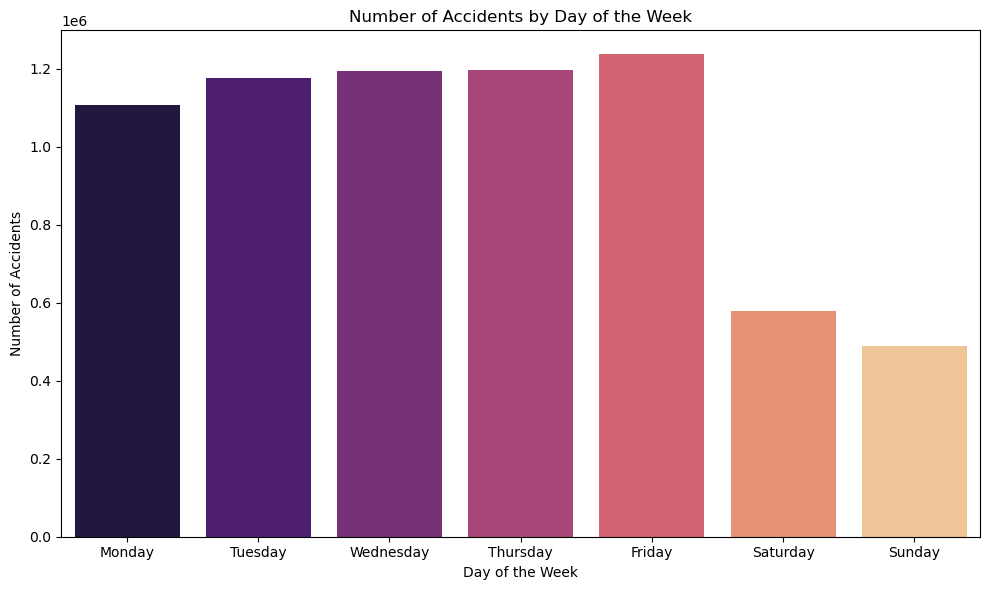

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'Start_Time' has been converted to datetime
df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')

# Extract the day of the week
df['Day_of_Week'] = df['Start_Time'].dt.strftime('%A')

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.countplot(x='Day_of_Week', data=df, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette='magma')
plt.title('Number of Accidents by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Accidents')

plt.tight_layout()
plt.show()

> **_Weekdays had the consisent rate of accidents. Weekends have comparatively lower rate of accidents,_**

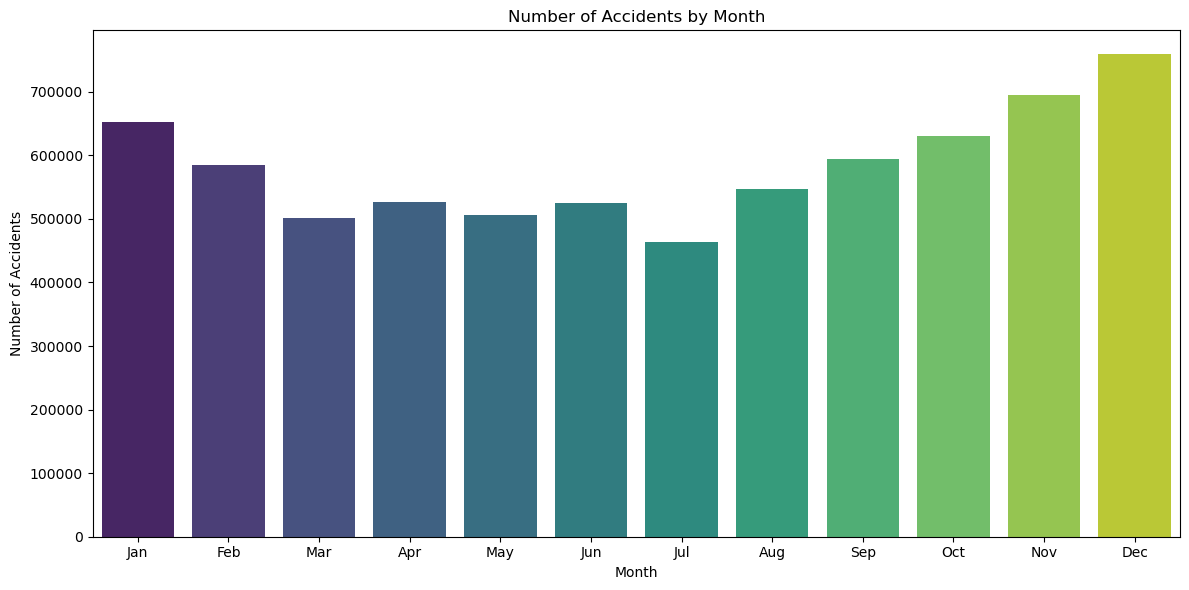

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt
import calendar

# Assuming 'Start_Time' has been converted to datetime
df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')

# Extract the month
df['Month'] = df['Start_Time'].dt.month

# Convert 'Month' column to integers (handle NaN values)
df['Month'] = df['Month'].astype('Int64')

# Replace NaN values with a default value (e.g., 0)
df['Month'] = df['Month'].fillna(0)

# Map month numbers to month names
df['Month'] = df['Month'].apply(lambda x: calendar.month_abbr[int(x)] if x != 0 else '')

# Create a bar plot for the number of accidents by month
plt.figure(figsize=(12, 6))
sns.countplot(x='Month', data=df, order=calendar.month_abbr[1:], palette='viridis')
plt.title('Number of Accidents by Month')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')

plt.tight_layout()
plt.show()

> **_December had the most number of accidents._**

In [65]:
df['Year'] = df['Start_Time'].dt.year
df['Year']

0          2016.0
1          2016.0
2          2016.0
3          2016.0
4          2016.0
            ...  
7728389    2019.0
7728390    2019.0
7728391    2019.0
7728392    2019.0
7728393    2019.0
Name: Year, Length: 7728394, dtype: float64

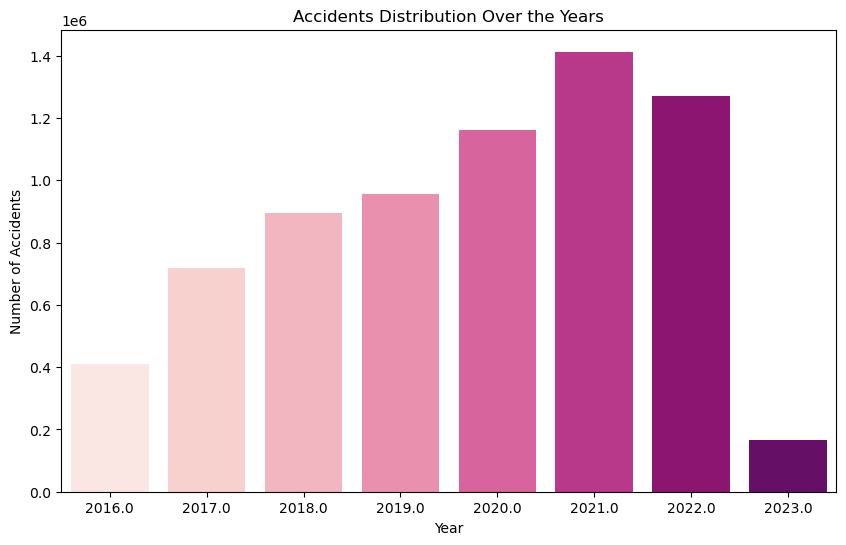

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame with the 'Year' column
plt.figure(figsize=(10, 6))
sns.countplot(x='Year', data=df, palette='RdPu')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.title('Accidents Distribution Over the Years')
plt.show()

> **_2021 had the highest number of accidents_**

> **_The number of accidents have increased over the years._**

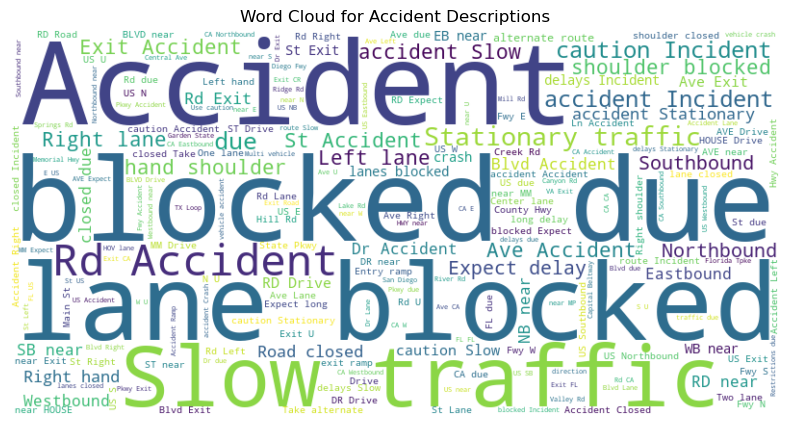

In [11]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Concatenate all descriptions into a single string
text = ' '.join(df['Description'].dropna())

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, max_words=200, background_color='white').generate(text)

# Display the generated word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Accident Descriptions')
plt.show()

In [ ]:
# Assuming you have a DataFrame 'df' with columns 'Visibility(mi)' and 'Severity'
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Visibility(mi)', y='ID', data=df, alpha=0.1, color='blue')
plt.title('Accident Rate vs Visibility')
plt.xlabel('Visibility (mi)')
plt.ylabel('Severity')
plt.show()

## Distribution of accidents state wise:

In [4]:
#Which state had the max number of accidents?
df.State.value_counts().sort_values(ascending=False)

State
CA    1741433
FL     880192
TX     582837
SC     382557
NY     347960
NC     338199
VA     303301
PA     296620
MN     192084
OR     179660
AZ     170609
GA     169234
IL     168958
TN     167388
MI     162191
LA     149701
NJ     140719
MD     140417
OH     118115
WA     108221
AL     101044
UT      97079
CO      90885
OK      83647
MO      77323
CT      71005
IN      67224
MA      61996
WI      34688
KY      32254
NE      28870
MT      28496
IA      26307
AR      22780
NV      21665
KS      20992
DC      18630
RI      16971
MS      15181
DE      14097
WV      13793
ID      11376
NM      10325
NH      10213
WY       3757
ND       3487
ME       2698
VT        926
SD        289
Name: count, dtype: int64

In [10]:
#State code maaping:

state_code_mapping = {
    'AL': 'Alabama',
    'AK': 'Alaska',
    'AZ': 'Arizona',
    'AR': 'Arkansas',
    'CA': 'California',
    'CO': 'Colorado',
    'CT': 'Connecticut',
    'DE': 'Delaware',
    'FL': 'Florida',
    'GA': 'Georgia',
    'HI': 'Hawaii',
    'ID': 'Idaho',
    'IL': 'Illinois',
    'IN': 'Indiana',
    'IA': 'Iowa',
    'KS': 'Kansas',
    'KY': 'Kentucky',
    'LA': 'Louisiana',
    'ME': 'Maine',
    'MD': 'Maryland',
    'MA': 'Massachusetts',
    'MI': 'Michigan',
    'MN': 'Minnesota',
    'MS': 'Mississippi',
    'MO': 'Missouri',
    'MT': 'Montana',
    'NE': 'Nebraska',
    'NV': 'Nevada',
    'NH': 'New Hampshire',
    'NJ': 'New Jersey',
    'NM': 'New Mexico',
    'NY': 'New York',
    'NC': 'North Carolina',
    'ND': 'North Dakota',
    'OH': 'Ohio',
    'OK': 'Oklahoma',
    'OR': 'Oregon',
    'PA': 'Pennsylvania',
    'RI': 'Rhode Island',
    'SC': 'South Carolina',
    'SD': 'South Dakota',
    'TN': 'Tennessee',
    'TX': 'Texas',
    'UT': 'Utah',
    'VT': 'Vermont',
    'VA': 'Virginia',
    'WA': 'Washington',
    'WV': 'West Virginia',
    'WI': 'Wisconsin',
    'WY': 'Wyoming'
}

df['state_name'] = df['State'].map(state_code_mapping)

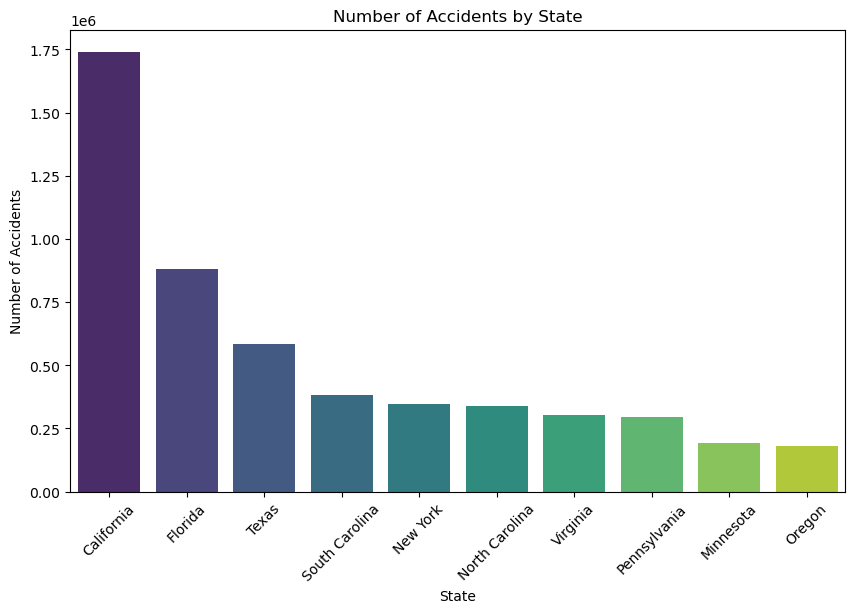

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

state_counts = df['state_name'].value_counts().sort_values(ascending=False)[:10]
plt.figure(figsize=(10, 6))
sns.barplot(x=state_counts.index, y=state_counts.values, palette='viridis')
plt.title('Number of Accidents by State')
plt.xlabel('State')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()

> **_California state had the maximum number of accidents_**

In [18]:
import pandas as pd

# Assuming df is your DataFrame
df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')  # Corrected column name

# Group by date and calculate the average
average_accidents_per_day = df.groupby(df['Start_Time'].dt.date).size().mean()  # Corrected column name

# Round to the nearest integer
rounded_average_accidents_per_day = round(average_accidents_per_day)

print(f'Average number of accidents per day (rounded): {rounded_average_accidents_per_day}')

Average number of accidents per day (rounded): 2718


> **_Average number of accidents per day : 2718_**

In [28]:
#Number of accidents daily in california

# Assuming df is your DataFrame*count the number of accidents
daily_accidents_california = round(california_df.groupby(california_df['Start_Time'].dt.date).size().mean())

print(f'Average number of daily accidents in California:\n{daily_accidents_california}')

Average number of daily accidents in California:
627


In [29]:
#Which city has the lowest number of accidents?

df.state_name.value_counts().sort_values(ascending=True)[:1]

state_name
South Dakota    289
Name: count, dtype: int64

> **_South Dakota state had the minimum number of accidents._**

In [38]:
#Average number of daily road accidents in SD

# Assuming df is your DataFrame
df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')  # Corrected column name

# Filter for California
dakota_df = df[df['State'] == 'SD']

# Group by date and count the number of accidents
daily_accidents_dakota = round(dakota_df.groupby(dakota_df['Start_Time'].dt.date).size().mean())

print(f'Average number of daily accidents in South Dakota:\n{daily_accidents_dakota}')

Average number of daily accidents in South Dakota:
3
